# Tutorial: Probability Transformations

In this notebook, we will work through an application of the change of variables formula for probability densities:

$p(y) = p(x)\left|\frac{dx}{dy}\right|$.

Let $\theta$ be uniformly distributed on $-0.95\frac{\pi}{2} < \theta < 0.95\frac{\pi}{2}$, and consider the function $b(\theta)=\tan(\theta)$.

In [1]:
TutorialName = 'probability_transformations'
exec(open('tbc.py').read()) # define TBC and TBC_above
import numpy as np
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Solve it

Given the PDF of $\theta$ and the function $b(\theta)$, what is the PDF of $b$, $p(b)$? (As simple as it is, you might want to explicitly write down $p(\theta)$ first.)

Next, define $p(b)$ as a function.

In [25]:
# p(b) according to the change of variables formula
def p_b(b):
    return np.cos(b)**2/(np.pi)

## 2. Check on a grid

We can also do this transformation via numerical calculation done on a grid. This defines a grid of $\theta$ values on the interval where $p(\theta)$ is non-zero for us to use.

In [26]:
theta_grid = np.arange(-0.95, 0.96, 0.05)*0.5*np.pi

Evaluate $p(\theta)$ at these points.

In [27]:
theta_grid.shape

(39,)

In [28]:
tgrid_p_theta = np.ones(39)/(0.5*np.pi*1.9)

If that was done right, a tabular integration of the grid evaluations should return 1.0, or something very close.

In [29]:
# check normalization
np.trapz(y=tgrid_p_theta, x=theta_grid)

1.0000000000000009

Next, transform the gridded evaluations of $p(\theta)$ to $p(b)$ by applying the same transformation of variables as before.

In [30]:
tgrid_p_b = p_b(theta_grid)

Let's plot the function and grid evaluatations for sanity's sake.

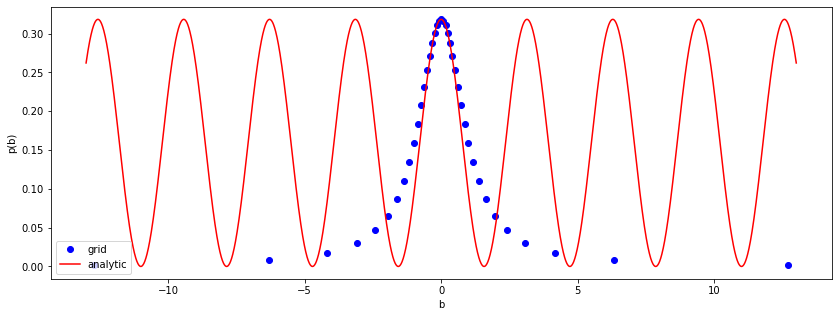

In [31]:
b_grid = np.arange(-13.0, 13.01, 0.01)

plt.rcParams['figure.figsize'] = (14.0, 5.0)
plt.plot(np.tan(theta_grid), tgrid_p_b, 'bo', label='grid');
plt.plot(b_grid, p_b(b_grid), 'r-', label='analytic');
plt.xlabel('b');
plt.ylabel('p(b)');
plt.legend();

We can check that the gridded values are still normalized (accounting for the fact that the grid is not evenly spaced in $b$). Note that the Riemann sum here could well be off by a few percent, as the transformed grid spacing does not provide good coverage of the tails of the function.

In [32]:
# check normalization
np.trapz(y=tgrid_p_b, x=np.tan(theta_grid))

0.9709954168624736

As even more of a sanity check, you can compare your solution to one saved below. The difference should be basically zero everywhere.

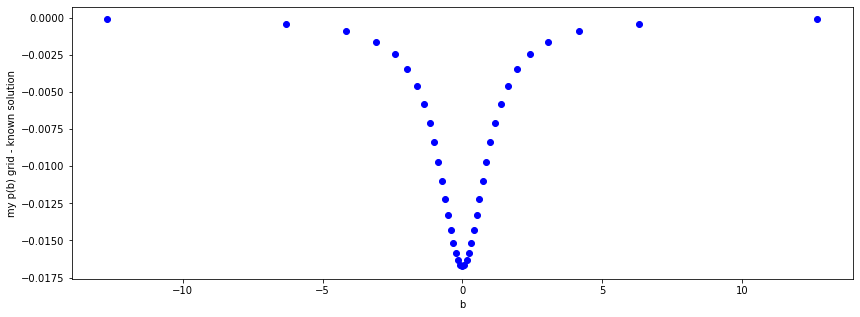

In [34]:
sol = np.loadtxt('trans.dat')
plt.rcParams['figure.figsize'] = (14.0, 5.0)
plt.plot(np.tan(theta_grid), tgrid_p_b-sol, 'bo');
plt.xlabel('b');
plt.ylabel('my p(b) grid - known solution');

## 3. Check with samples

This transformation business is kind of a pain, what with the calculus and possibly ending up with non-uniform grid points. It turns out that life is much more straightforward when dealing with _samples_ of a PDF rather than manipulation the PDF itself.

To demonstrate, generate a large number (say, $10^5$) of samples from $p(\theta)$, and straightforwardly transform them to samples of $b$ using the definition of $b(\theta)$.

In [40]:
theta_samples = np.random.uniform(low=-0.95*(np.pi/2),high=0.95*(np.pi/2),size=10**5)
b_samples = p_b(theta_samples)

We can now compute an estimate of the PDF for $b$ based on these samples, say a histogram. In the limit of many samples, they should agree very well - you can play around with changing the number of samples and histogram bins to see how that changes things.

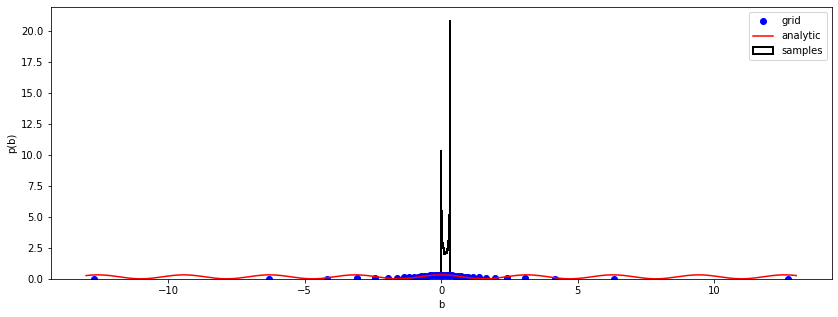

In [41]:
plt.rcParams['figure.figsize'] = (14.0, 5.0)
plt.plot(np.tan(theta_grid), tgrid_p_b, 'bo', label='grid');
plt.plot(b_grid, p_b(b_grid), 'r-', label='analytic');
plt.hist(b_samples, bins=100, density=True, histtype='step', color='k', linewidth=2, label='samples');
plt.xlabel('b');
plt.ylabel('p(b)');
plt.legend();